In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

1028178
(478, 717, 3)


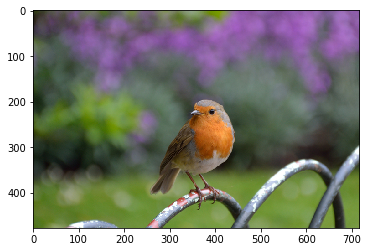

In [20]:
img = cv2.imread("./sample.jpg")
print(img.size)
print(img.shape)
# cv2.imshow("sample", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# 上の方法だとjupyter が調子悪くなるので、plt使う方がいい
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
img_size = (512, 512)

In [ ]:
cv2で画像処理する際は、RGBではなく(B, G, R)の順番になる

In [6]:
my_img = np.array([[[0, 0, 255] for _ in range(img_size[1])] for _ in range(img_size[0])])

In [ ]:
# めっちゃ重い
# cv2.startWindowThread()
# cv2.namedWindow("window")
# cv2.imshow("window", my_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

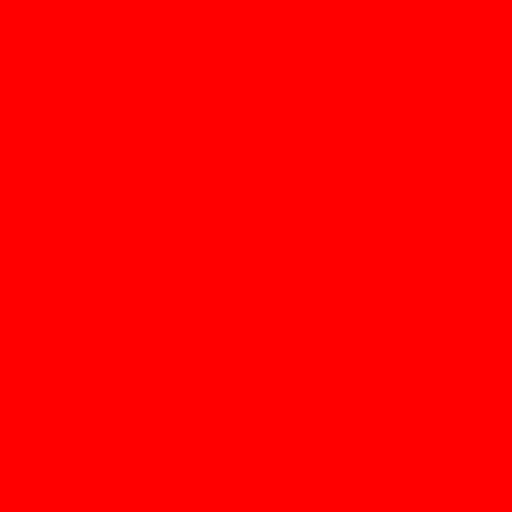

In [16]:
display_cv_image(my_img)

In [7]:
cv2.imwrite("my_red_img.jpg", my_img)

True

In [8]:
from IPython.display import display, Image

def display_cv_image(image, format='.png'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

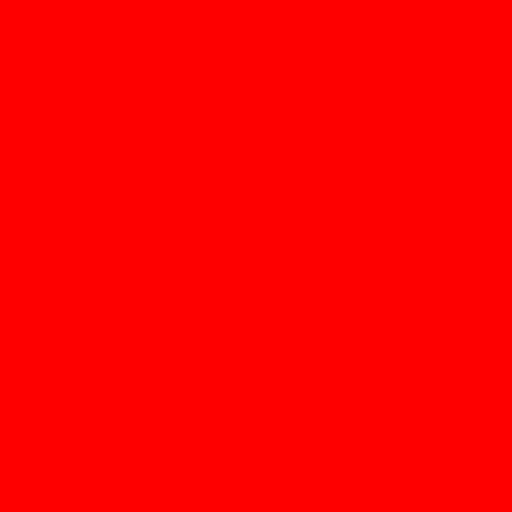

In [11]:
display_cv_image(my_img, '.jpg')

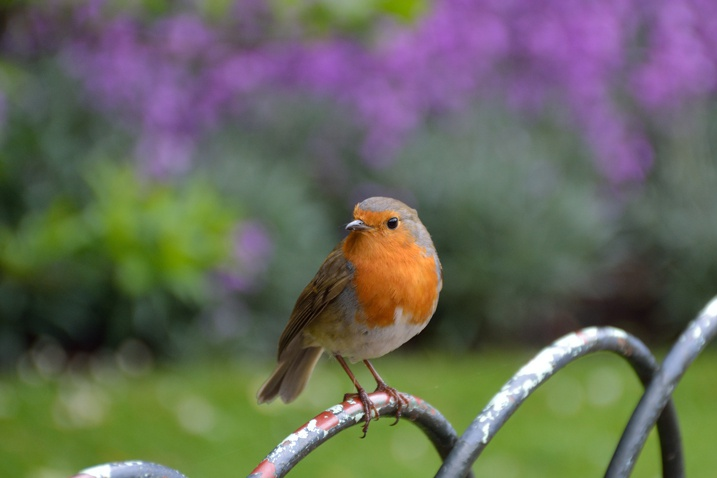

In [13]:
display_cv_image(img, '.jpg')

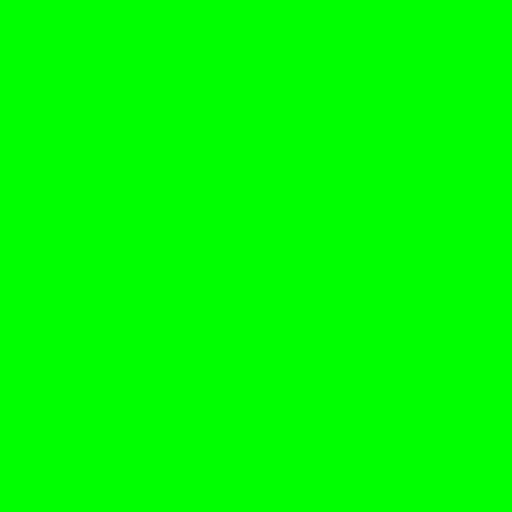

In [14]:
green_img = np.array([[[0, 255, 0] for _ in range(img_size[1])] for _ in range(img_size[0])], dtype="uint8")

cv2.imshow("sample", green_img)
display_cv_image(green_img, '.jpg')

In [ ]:
トリミングとリサイズ

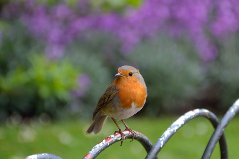

In [25]:
# 画像を表す行列の一部を取り出してくれば、それがトリミングとなります
# trimed_img = img[: img.shape[1] // 6 * 3,   img.shape[0] // 5 : img.shape[0] // 5 * 3]

# 今回はもとの倍率を保ったまま幅と高さをそれぞれ2倍します。新たにサイズを指定する際、(幅、高さ)の順になることに注意してください
enlarged_img = cv2.resize(img, (img.shape[1] // 3, img.shape[0] // 3))
display_cv_image(enlarged_img)

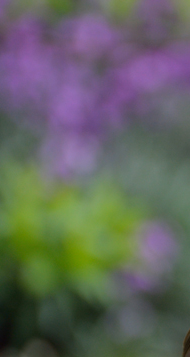

In [31]:
trimed_img = img[: img.shape[1] // 6 * 3,   img.shape[0] // 5 : img.shape[0] // 5 * 3]
display_cv_image(trimed_img)

In [ ]:
回転するときはcv2.warpAffine()を使います。
この関数ではアフィン変換という変換を行っています。
その際に必要となる行列はcv2.getRotationMatrix2Dで入手することができます。
また、反転はcv2.flip(画像, 対象とする軸)を用いることで可能です。

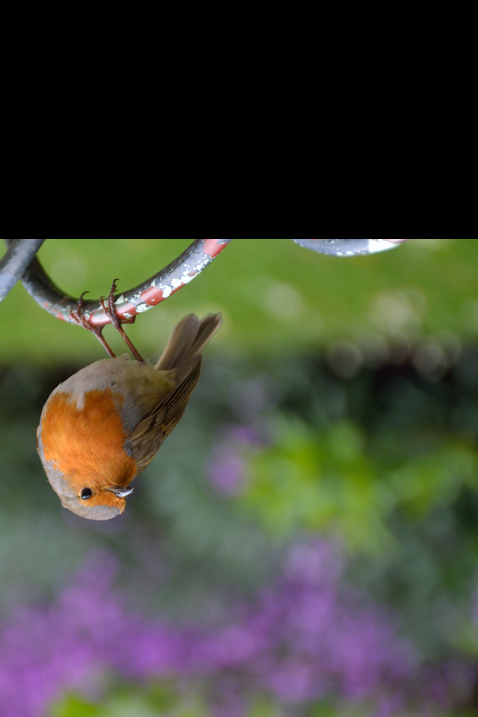

In [41]:
# 回転

# warpAffine()を用いるのに必要な行列をつくります
# 第一引数が回転の中心(今回は画像の中心)です
# 第二引数は回転角度(今回は180度)です
# 第三引数は倍率(今回は2倍に拡大)です
# mat = cv2.getRotationMatrix2D(tuple(np.array(img.shape[:2]) / 2), 180, 2.0)
mat = cv2.getRotationMatrix2D(tuple(np.array(img.shape[:2]) // 2), 180, 1.0)

# アフィン変換をします
# 第一引数が変換したい画像です
# 第二引数が上で生成した行列(mat)です
# 第三引数がサイズです

rotated_img = cv2.warpAffine(img, mat, img.shape[:2])

display_cv_image(rotated_img)

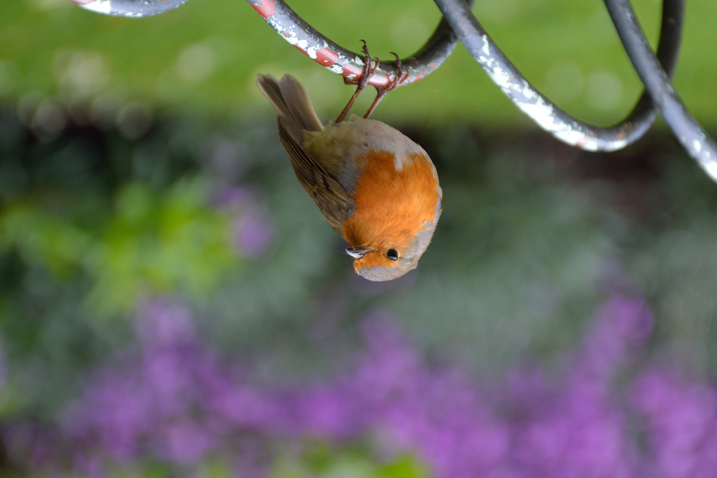

In [57]:
# 反転

fliped_img = cv2.flip(img, 0)
display_cv_image(fliped_img)

In [ ]:
色調変換・色反転

lab色空間 : 人間の資格に近似するように設計されている点で優れている

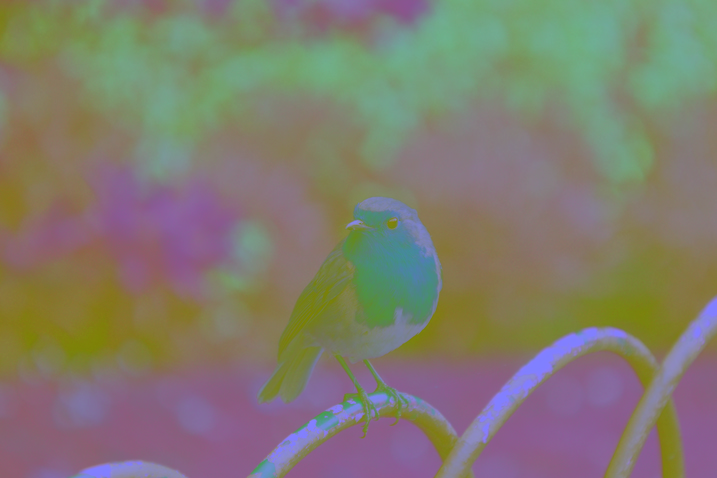

In [58]:
my_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
display_cv_image(my_img)

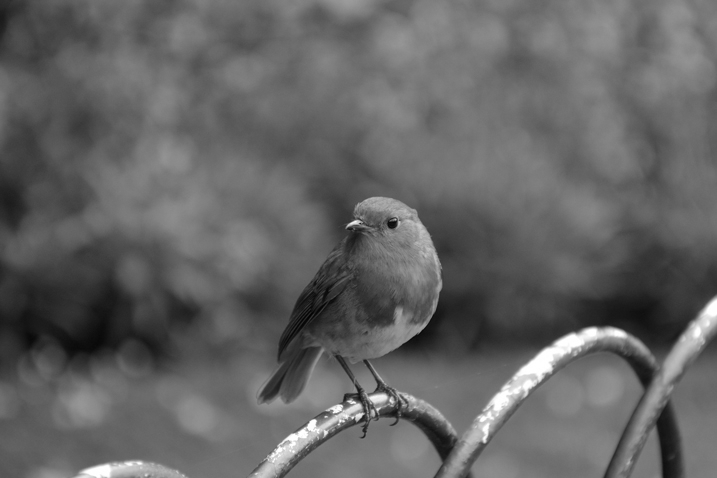

In [60]:
my_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
display_cv_image(my_img)

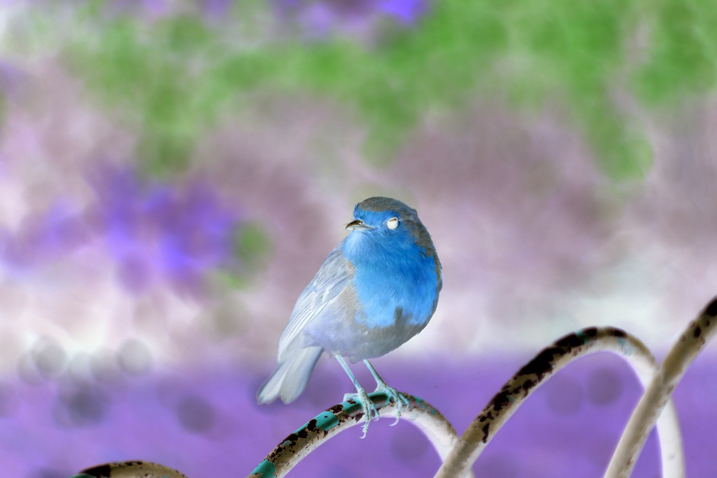

In [73]:
converted_img = cv2.imread("./sample.jpg")
subtracted_img = cv2.imread("./sample.jpg")

# 色を反転させる。255から引けば良い
for i in range(len(img)):
    for j in range(len(img[i])):
        for k in range(len(img[i][j])):
            converted_img[i][j][k] = 255 - subtracted_img[i][j][k]

display_cv_image(converted_img)

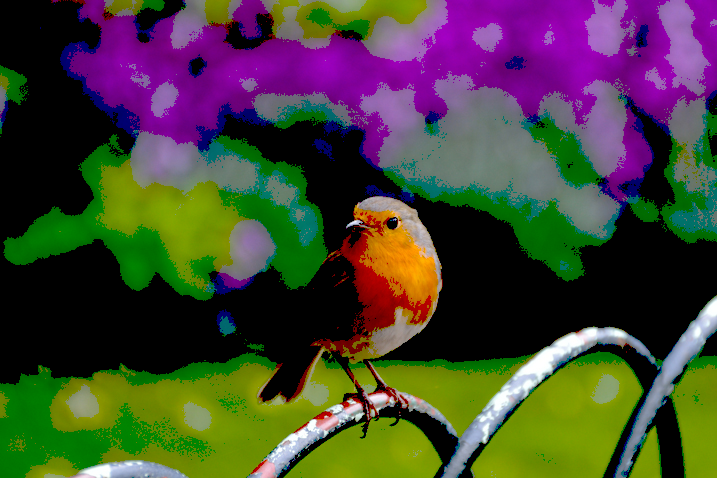

In [94]:
# 閾値処理(二値化)
# 画像の容量を小さくするために、一定以上明るいもの、あるいは一定以上暗いものを全て同じ値にしてしまうこと

# 第一引数が処理する画像です
# 第二引数がしきい値です
# 第三引数が最大値(maxvalueとする)です
# 第四引数はTHRESH_BINARY, THRESH_BINARY_INV, THRESH_TOZERO, THRESH_TORUNC, THRESH_TOZERO_INVのいずれかとなります。

# 解説は以下の通りです
# THRESH_BINARYを選んだ場合は、しきい値より大きい値はmaxvalueに、そうでないものは0になる、THRESH_BINARY_INVはその逆
# THRESH_TORUNCは、しきい値より大きい値はしきい値に、そうでないものはそのまま
# THRESH_TOZEROはしきい値より大きい値はそのまま、小さい値は0になる、THRESH_TOZERO_INVはその逆
# 今回はしきい値を75,最大値を255(今回は使用されない)にして、THRESH_TOZEROをつかう
# しきい値も返されるのでretvalで受け取ります

img = cv2.imread("./sample.jpg")
retval, my_img = cv2.threshold(img, 100, 255, cv2.THRESH_TOZERO)
display_cv_image(my_img)

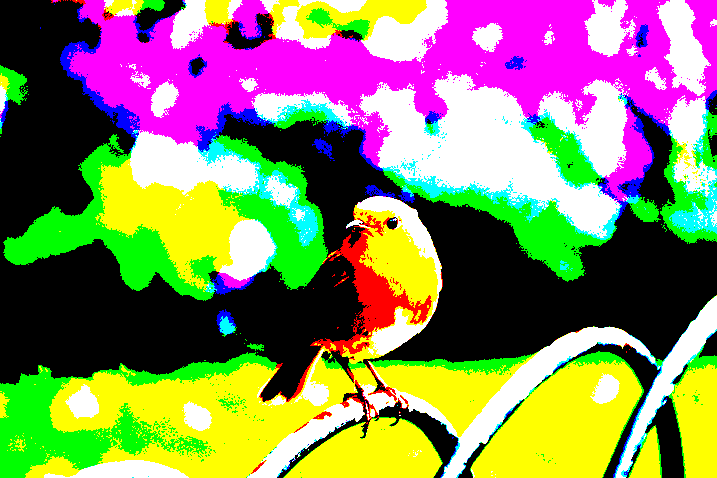

In [95]:
img = cv2.imread("./sample.jpg")
retval, my_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
display_cv_image(my_img)
# THRESH_BINARY, THRESH_BINARY_INV, THRESH_TOZERO, THRESH_TORUNC, THRESH_TOZERO_INV

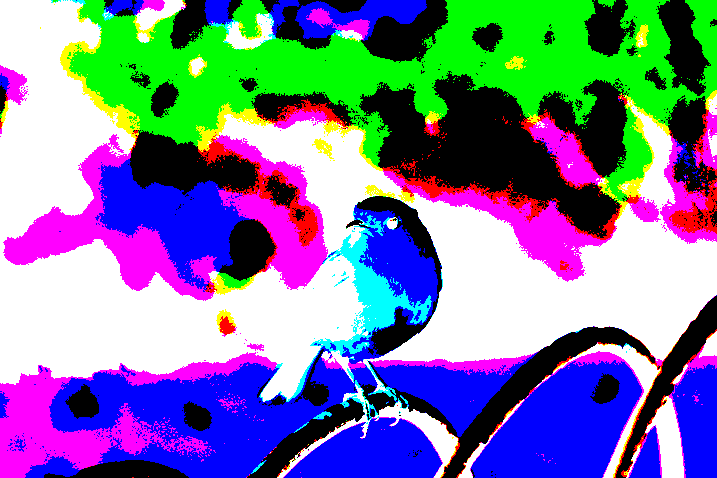

In [96]:
img = cv2.imread("./sample.jpg")
retval, my_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)
display_cv_image(my_img)
# THRESH_BINARY, THRESH_BINARY_INV, THRESH_TOZERO, THRESH_TORUNC, THRESH_TOZERO_INV

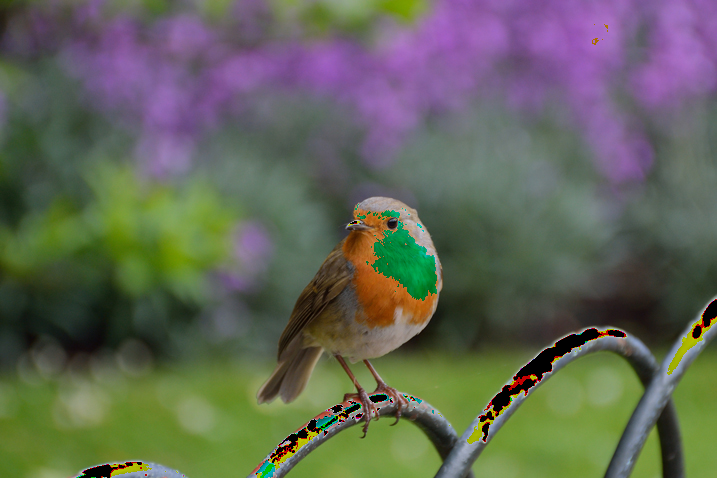

In [98]:
img = cv2.imread("./sample.jpg")
retval, my_img = cv2.threshold(img, 200, 255, cv2.THRESH_TOZERO_INV)
display_cv_image(my_img)
# THRESH_BINARY, THRESH_BINARY_INV, THRESH_TOZERO, THRESH_TORUNC, THRESH_TOZERO_INV

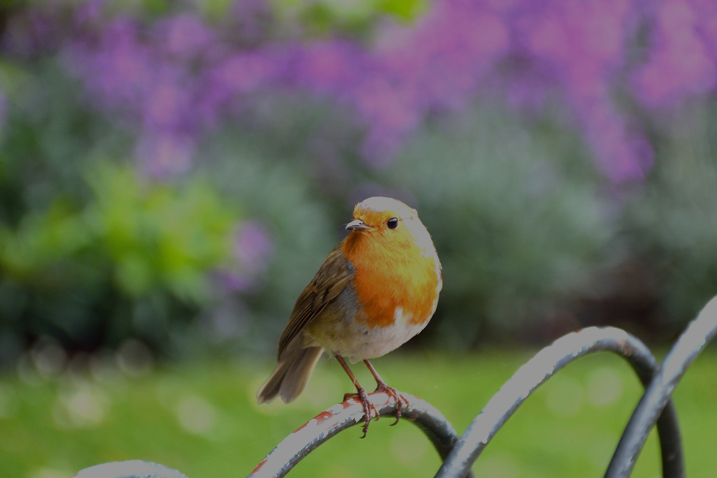

In [99]:
img = cv2.imread("./sample.jpg")
retval, my_img = cv2.threshold(img, 150, 255, cv2.THRESH_TRUNC)
display_cv_image(my_img)
# THRESH_BINARY, THRESH_BINARY_INV, THRESH_TOZERO, THRESH_TRUNC, THRESH_TOZERO_INV

In [ ]:
マスキング
画像の一部分のみを取り出す。
白黒でチャンネル数が１の画像を用意し、これをマスク用の画像として使う。
ある画像の、マスク用画像の白い部分と同じ部分だけ抽出することができる。

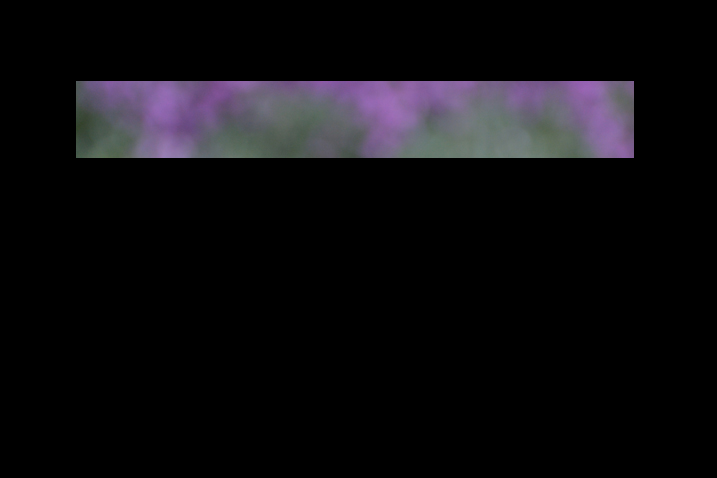

In [102]:
img = cv2.imread("./sample.jpg")

# 第二引数を０とすると、チャンネル数が１の画像に変換できる
mask = cv2.imread("./mask.png", 0)
mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

masked = cv2.bitwise_and(img, img, mask = mask)

display_cv_image(masked)

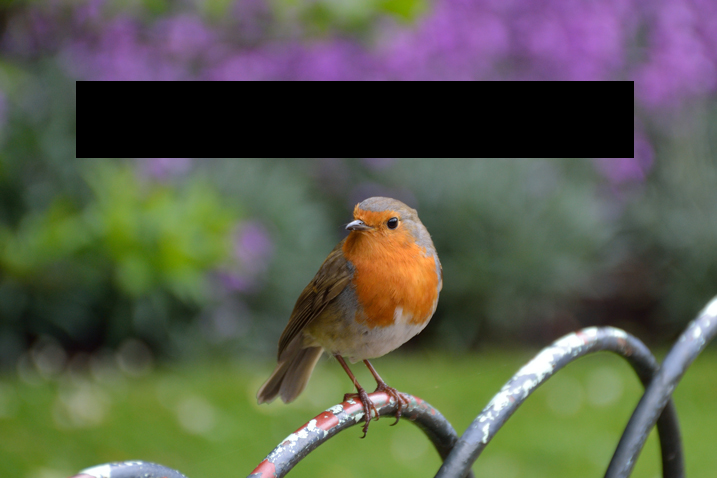

In [103]:
img = cv2.imread("./sample.jpg")

# 第二引数を０とすると、チャンネル数が１の画像に変換できる
mask = cv2.imread("./mask.png", 0)
mask = cv2.resize(mask, (img.shape[1], img.shape[0]))
retval, mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY_INV)

masked = cv2.bitwise_and(img, img, mask = mask)
display_cv_image(masked)

In [ ]:
画像をぼかす
あるピクセルの周りのn * nこのピクセルとの平均を取る。
ボカシの関数は GaussianBlur

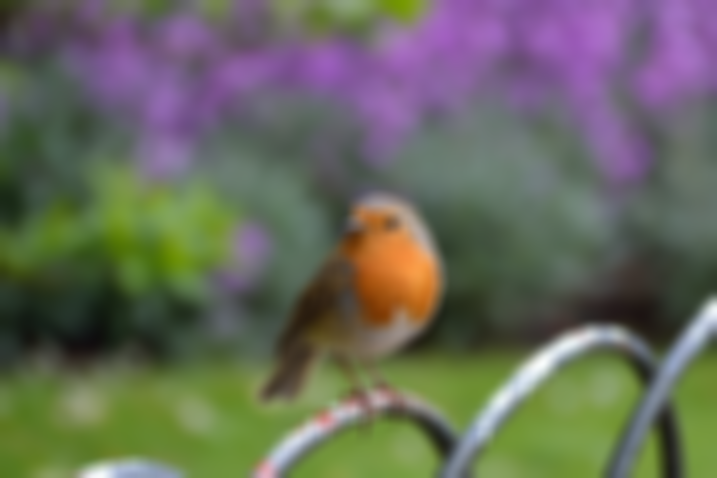

In [111]:
img = cv2.imread("./sample.jpg")

# 第一引数は元の画像です
# 第二引数はn✕nのnの値を指定します(nは奇数)
# 第三引数はx軸方向の偏差(通常は0でよい)です

blured = cv2.GaussianBlur(img, (17, 17), 10)
display_cv_image(blured)

In [ ]:
ノイズの除去
cv2.fastNlMeansDenoisingColored()

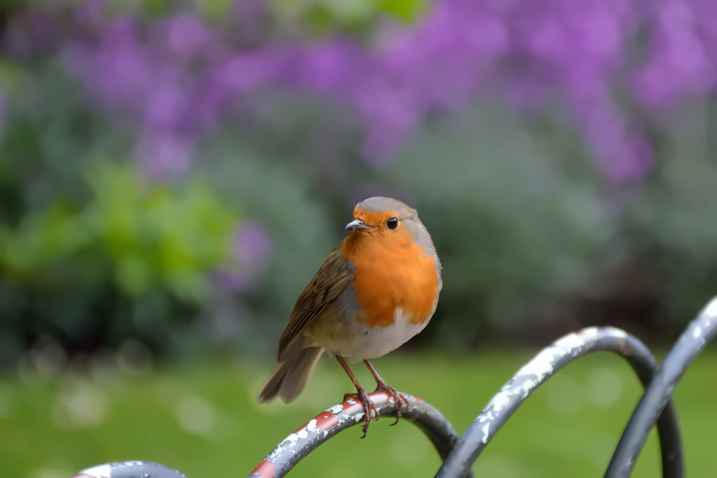

In [112]:
img = cv2.imread("./sample.jpg")
my_img = cv2.fastNlMeansDenoisingColored(img)
display_cv_image(my_img)

In [ ]:
膨張・収縮
膨張と収縮は主に2値画像で行われます。
あるピクセルを中心とし、フィルタ内の最大値をその中心の値にすることを膨張、逆に最小値をその中心の値にすることを収縮といいます。
フィルタは、中心のピクセルの上下左右4つを用いる方法と、自身を囲む8つを用いる方法の2通りが主です。

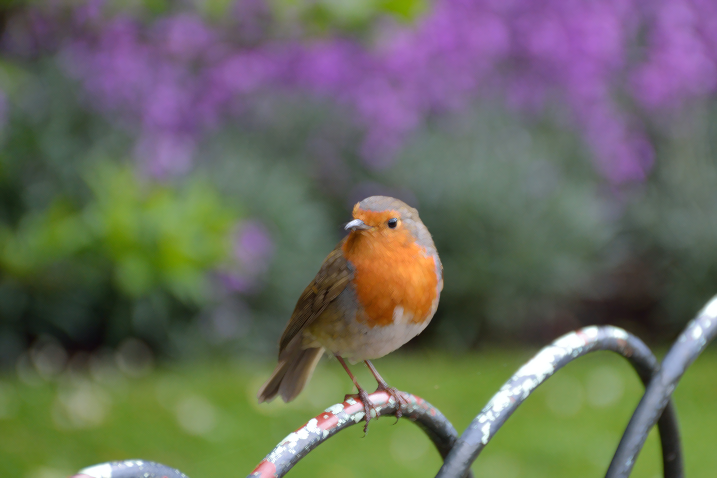

In [114]:
# 膨張　dilate

img = cv2.imread("./sample.jpg")

# フィルタの定義
filt = np.array([[0, 1, 0],
                [1, 0, 1],
                [0, 1, 0]], np.uint8)

my_img = cv2.dilate(img, filt)
display_cv_image(my_img)

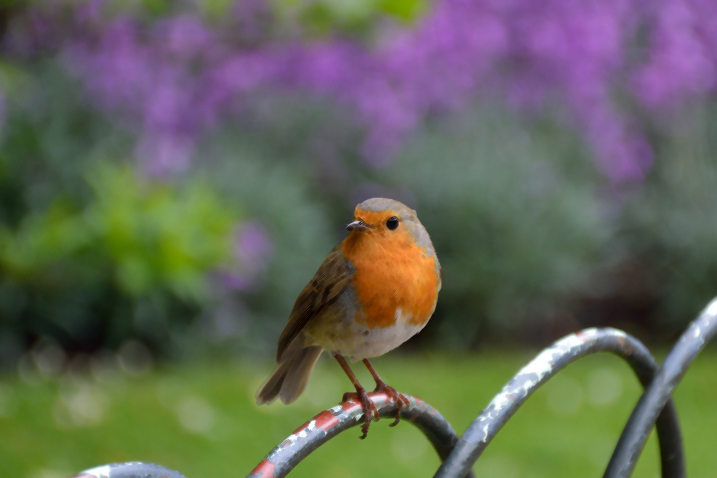

In [116]:
# 収縮 erode
img = cv2.imread("./sample.jpg")

# フィルタの定義
filt = np.array([[0, 1, 0],
                [1, 0, 1],
                [0, 1, 0]], np.uint8)

my_img = cv2.erode(img, filt)
display_cv_image(my_img)